# Digit Recognition Using SVM

Let's now tackle a slightly more complex problem - digit recognition. We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters.


## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
digits=pd.read_csv("train.csv")

In [4]:
#dimentions of data
digits.shape

(42000, 785)

In [5]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
#checking the data
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
digits.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
digits.isnull().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

 Hence, there are no null values in DataFrame.

In [9]:
order = list(np.sort(digits['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<Axes: xlabel='label', ylabel='count'>

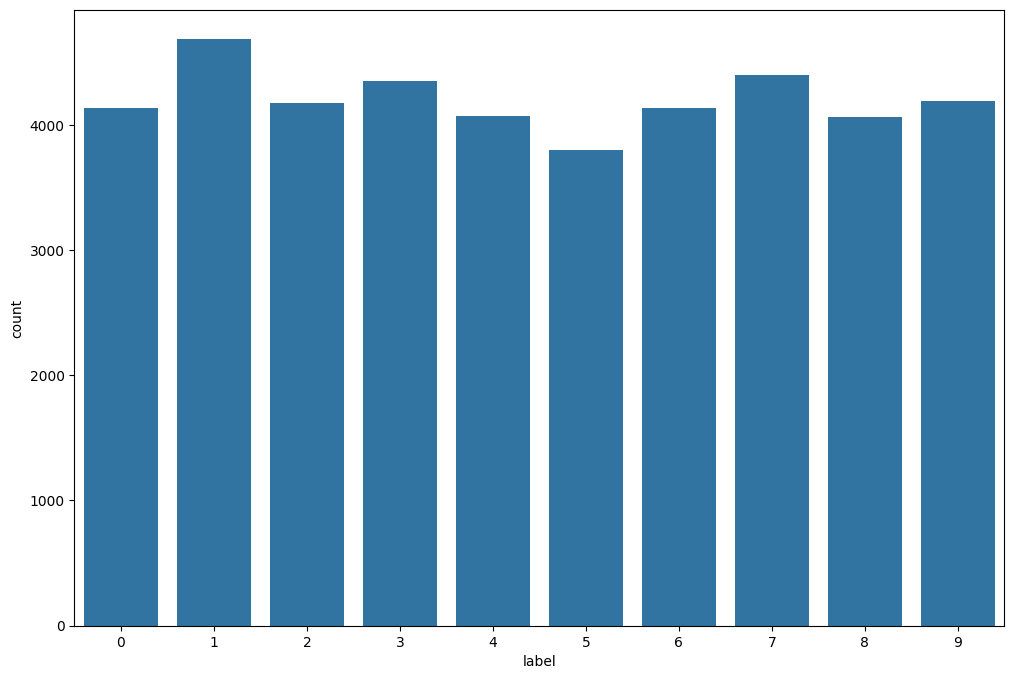

In [10]:
# basic plots: How do various attributes vary with the digits

plt.figure(figsize=(12, 8))
sns.countplot(x='label', 
            data=digits, 
            order=order)

## Data Preparation

#### Since, training data has 42000 entries which are too many for SVM to process data, we will take sample of this data.

In [11]:
digits_sample = digits.sample(frac=0.1, random_state=42)

In [12]:
digits_sample.shape

(4200, 785)

In [13]:
# splitting into X and y
X = digits_sample.drop("label", axis = 1)
y = digits_sample['label']

In [14]:
# scaling the features
X_scaled = scale(X)

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 100)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [16]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
# predict
y_pred = model_linear.predict(X_test)

In [18]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.8928571428571429 



In [19]:
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[125   0   1   0   0   1   1   0   1   0]
 [  0 134   1   0   0   1   0   0   0   0]
 [  1   4  89   4   3   0   3   3   1   0]
 [  2   0   1 134   0   3   0   2   4   0]
 [  0   0   2   1 118   0   1   0   0   6]
 [  1   1   0   7   3  89   2   1   1   1]
 [  5   0   2   0   4   2 105   0   1   0]
 [  0   3   3   0   3   0   0 110   0   3]
 [  2   4   3   8   2   4   0   0  98   1]
 [  1   0   2   2   6   0   0  10   0 123]]


The linear model gives approx. 89% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [20]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9071428571428571 

[[122   0   2   0   0   1   0   2   2   0]
 [  0 133   1   1   0   0   1   0   0   0]
 [  1   1  93   0   3   0   2   6   2   0]
 [  0   0   2 131   0   2   0   9   2   0]
 [  0   0   3   1 115   1   1   2   0   5]
 [  0   1   1   3   2  96   1   0   0   2]
 [  3   0   0   0   1   1 110   2   2   0]
 [  0   3   3   0   0   0   0 114   0   2]
 [  0   3   1   6   0   4   0   3 103   2]
 [  0   0   1   2   3   0   0  11   1 126]]


The non-linear model gives approx. 91% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [22]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [23]:
GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise', estimator=SVC(gamma='auto'), n_jobs=1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [24]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.524469,0.108310,0.646207,0.057131,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.639456,0.653061,0.692177,...,0.672109,0.023054,12,0.999575,0.999150,0.999575,0.999575,1.000000,0.999575,0.000269
1,0.527415,0.032150,0.380607,0.025528,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.894558,0.896259,0.903061,...,0.903741,0.009657,6,0.968112,0.967687,0.967262,0.966412,0.966412,0.967177,0.000680
2,0.791488,0.018478,0.520034,0.034099,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.841837,0.853741,0.850340,...,0.858163,0.015005,8,0.888605,0.890731,0.889031,0.886480,0.887755,0.888520,0.001408
3,1.541826,0.061674,0.587291,0.006600,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.656463,0.698980,0.717687,...,0.698639,0.023746,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.474161,0.017801,0.351635,0.030633,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.901361,0.913265,0.913265,...,0.915306,0.008961,1,0.999150,0.999150,0.998724,0.999575,0.999150,0.999150,0.000269
5,0.382125,0.017008,0.304351,0.006106,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.901361,0.899660,0.914966,...,0.908163,0.010261,4,0.962585,0.959184,0.955782,0.958759,0.957058,0.958673,0.002304
6,1.528552,0.042383,0.600697,0.024803,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.656463,0.698980,0.717687,...,0.698639,0.023746,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.462317,0.011283,0.339280,0.013265,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.901361,0.913265,0.906463,...,0.913946,0.009657,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.309489,0.013728,0.279391,0.033752,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.891156,0.899660,0.903061,...,0.905782,0.011910,5,0.996599,0.995748,0.995748,0.997449,0.996173,0.996344,0.000636
9,1.480160,0.083120,0.579830,0.005000,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.656463,0.698980,0.717687,...,0.698639,0.023746,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


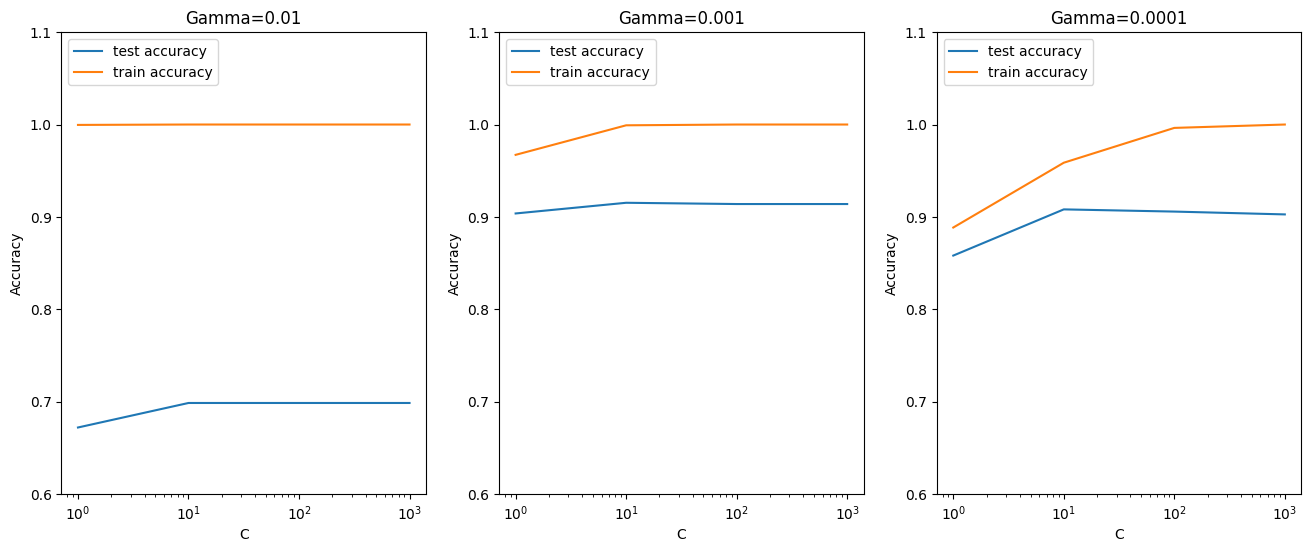

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Let's now choose the best hyperparameters. 

In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9153061224489797 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [27]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy for final model", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy for final model 0.919047619047619 

[[124   0   1   0   0   2   0   1   1   0]
 [  0 134   1   0   0   1   0   0   0   0]
 [  1   1  94   1   2   0   3   5   1   0]
 [  1   0   0 136   0   1   0   6   2   0]
 [  0   0   3   0 116   0   2   0   1   6]
 [  1   1   0   3   2  98   0   0   0   1]
 [  6   0   0   0   3   1 107   2   0   0]
 [  0   1   2   0   2   0   0 113   0   4]
 [  1   1   2   4   1   1   0   2 109   1]
 [  0   0   2   2   4   0   0   9   0 127]] 



### Predictions with final model

In [28]:
predicted=pd.DataFrame()

In [29]:
predicted['y_test']=y_test

In [30]:
predicted['y_pred']=y_pred

In [31]:
predicted.head(20)

,y_test,y_pred
24004,3,3
30149,4,4
30396,2,2
31483,7,7
35420,2,2
33579,0,0
27889,8,8
25283,9,9
20911,4,4
3168,3,3


### Predicting Values for test.csv

In [32]:
test_df=pd.read_csv("test.csv")

In [33]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_df['label'] = model.predict(test_df)

In [35]:
test_df.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
